<a href="https://colab.research.google.com/github/nitisha-pradhan/The_Sparks_Foundation_Internship/blob/main/Task_2_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Task 2: Prediction using Unsupervised ML</h2>
<h3>From the given ‘Iris’ dataset, predict the optimum number of clusters and
represent it visually.</h3><br>
<h2>Author: Nitisha Pradhan</h2>

In [ ]:
#Importing the required libraries
#numpy for mathematical operations
#pandas for data analysis and dataframe
#matplotlib for data visualization

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [ ]:
#Taking the dataset directly for the sklearn library. 
from sklearn import datasets

#Load the iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#Describe method to see various stats of the dataset.
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#There is no Y/target/label variable as clustering will be done by the Unsupervised ML. 
#All the features will be used for clustering.
X = df.iloc[:, :].values

Text(0, 0.5, 'Inertia')

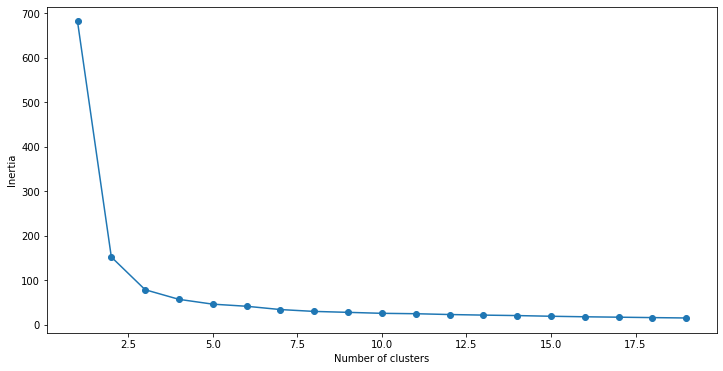

In [ ]:
#The k-means clustering algorithm will be used. 

#It can be imported from the sklearn library.
from sklearn.cluster import KMeans

#We initiate an empty list for SSE which will be used to store the the within cluster sum of squares (which is similiar to the sum of squared errors).
#The within-cluster sum of squares is a measure of the variability of the observations within each cluster.

SSE = []

#We use a for loop to try out various values for the number of clusters. 
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

#Now the results are plotted by making a new dataframe for it. 
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

<h3>Here, we will use The Elbow Method to find the optimum value of k.</h3>
<h4>So as we can see, the graph looks like an elbow. Thus, the graph is also called as the elbow curve.<br>
This "elbow" part gives us the optimum value of k.</h4>
<h3>By the help of the graph, we choose the number of clusters as 3. </h3>


In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

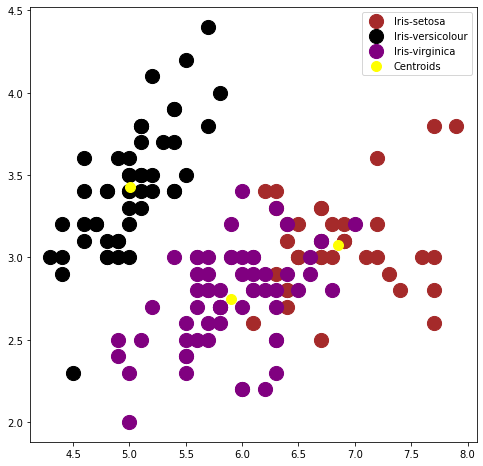

In [ ]:
#The clusters are visualized using the scatter plot.
plt.figure(figsize=(8, 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 200, c = 'brown', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 200, c = 'black', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 200, c = 'purple', label = 'Iris-virginica')

#The centroids of the clusters are also plotted.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

<h3>Thus, the Iris dataset has been divided into 3 clusters by using Unsupervised Machine Learning.</h3>